# Assignment - Logistic Regression

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.special import expit
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("ExData\car_data.csv")
df.set_index(["User ID"], inplace=True)
df['AnnualSalaryStd'] = StandardScaler().fit_transform(df['AnnualSalary'].values.reshape(-1,1))
df = pd.concat([df, pd.get_dummies(df['Gender'])], axis=1)
df.head()

,Gender,Age,AnnualSalary,Purchased,AnnualSalaryStd,Female,Male
User ID,,,,,,,
385,Male,35,20000,0,-1.528498,False,True
681,Male,40,43500,0,-0.846767,False,True
353,Male,49,74000,0,0.038032,False,True
895,Male,40,107500,1,1.009861,False,True
661,Male,25,79000,0,0.183081,False,True


In [3]:
clf = LogisticRegression(random_state=0)
clf.fit(df[['AnnualSalaryStd']].values, df['Purchased'].values)

LogisticRegression(random_state=0)

## Question 1

Finalize the analysis of the simple single variable model by generating the Classification Report and the ROC charts. Remember to interpret the results.

1. Use the classification_report function to find the precision and recall of the classifier
2. Generate the ROC Curves
   1. Use predict_proba() to generate the probability of purchase (1)
   2. With roc_curve() function, generate the false positivity rate, true positivity rate and thresholds
   3. Plot threshold versus false positivity rate and true positivity rate on the same graph
   4. Calculate the Area Under the Curve using the auc() function
   5. Plot false positivity rate vs true positivity rate on a new graph

In [4]:
#1. Classification Report
X = df[['AnnualSalaryStd']].values
y = df['Purchased'].values
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       598
           1       0.86      0.51      0.64       402

    accuracy                           0.77      1000
   macro avg       0.80      0.73      0.74      1000
weighted avg       0.79      0.77      0.76      1000



In [5]:
#2.A. probability of purchase(1)

# predict_proba() returns a 2-d array with col0 prob of y=0, and col1 prob of y=1
print(clf.predict_proba(X))

#to pull out just the prob = 1, index the array to pull all the rows and just column 1 
y_prob = clf.predict_proba(df['AnnualSalaryStd'].values.reshape(-1,1))[:, 1]
# y_prob

[[0.84248773 0.15751227]
 [0.75496111 0.24503889]
 [0.60092831 0.39907169]
 ...
 [0.2488698  0.7511302 ]
 [0.26913368 0.73086632]
 [0.60373947 0.39626053]]


Calculating the probabilities of purchase manually:
$
p(x) = \frac{1}{1+e^{-(\beta_0 + \beta_1 x)}}
$

In [6]:
clf.coef_, clf.intercept_

(array([[0.8091267]]), array([-0.44010715]))

In [7]:
#Can also calculate the y_prob manually using the coefficient and intercept from model
y_prob_calc = 1/(1+np.exp(-(clf.intercept_ + X * clf.coef_)))
y_prob_calc2 = expit(X*clf.coef_ + clf.intercept_) #can also use the scipy expit which does same calc as line above
# y_prob_calc2
    #any of the three methods above will generate the same results y_prob = y_prob_calc = y_prob_calc2

In [8]:
#2.B. ROC Curve
fpr, tpr, thresholds = roc_curve(y, y_prob)

(0.0, 1.0)

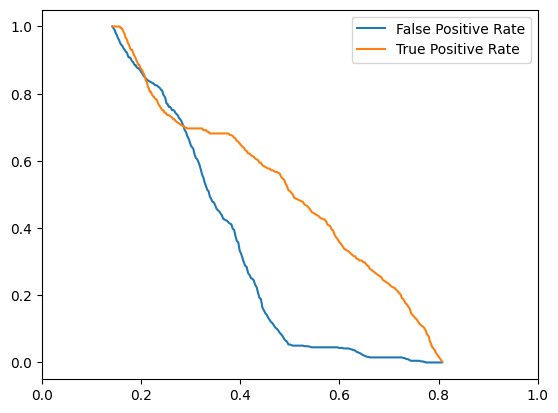

In [9]:
#2.C. Plot of FPR vs TPR
plt.plot(thresholds, fpr)
plt.plot(thresholds, tpr)
plt.legend(['False Positive Rate', 'True Positive Rate'])
plt.xlim(0,1)  # roc_curve() sets high threshold at y_prob.max() + 1

AUC: 0.6883142814356312


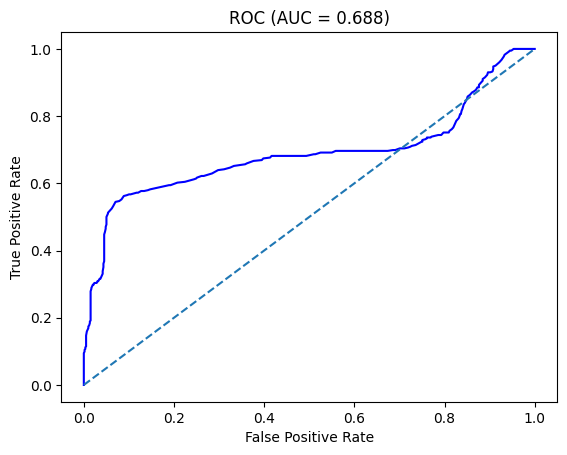

In [10]:
#2.D. Calculate AUC 
clf_auc = auc(fpr, tpr)
print("AUC:",clf_auc)

#2.E. plot of AUC
plt.plot(fpr, tpr, color='b')
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), linestyle="--")
plt.title("ROC (AUC = {:.3f})".format(clf_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Question 2

Add Age to the model, how does the performance improve?
1. Create a new classifier named clf2
2. Train the classifier using the .fit() method.
   1. Note: you will need to pass the two columns and uses the .values() method, but you don't need to use the .reshape() method
   2. You do not need to use .values(), this just avoids the issue of maintaining labelled data (DataFrame vs Numpy Array)
3. Print the classification report. How does the model improve?
4. Repeat part 2 of Question 1 with this new model.

In [26]:
X = df[['AnnualSalaryStd','Age']]
y = df['Purchased']
clf2 = LogisticRegression(random_state=0)
clf2.fit(X, y)

LogisticRegression(random_state=0)

In [27]:
print(classification_report(y, clf2.predict(X)))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       598
           1       0.82      0.73      0.77       402

    accuracy                           0.83      1000
   macro avg       0.83      0.81      0.82      1000
weighted avg       0.83      0.83      0.83      1000



In [13]:
clf2.score(X, y)

0.828

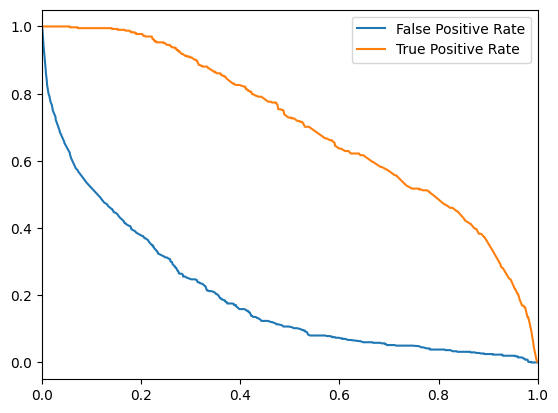

In [14]:
# predict_proba() returns prob=0, prob=1
y_prob = clf2.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_prob)

plt.plot(thresholds, fpr)
plt.plot(thresholds, tpr)
plt.legend(['False Positive Rate', 'True Positive Rate'])
plt.xlim(0,1)  # roc_curve() sets high threshold at y_prob.max() + 1
plt.show()

AUC: 0.915181616998619


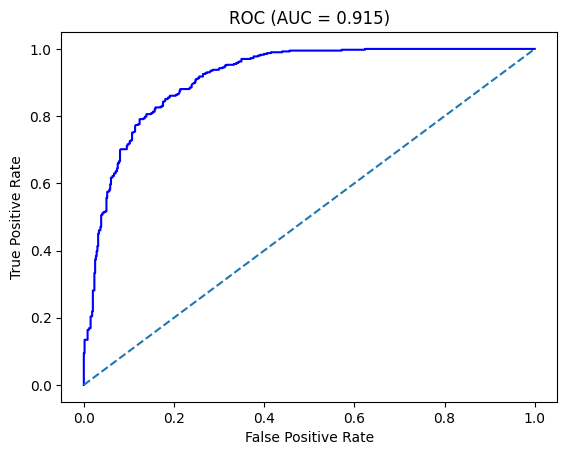

In [15]:
clf_auc = auc(fpr, tpr)
print("AUC:",clf_auc)

plt.plot(fpr, tpr, color='b')
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), linestyle="--")
plt.title(r"ROC (AUC = {:.3f})".format(clf_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Question 3

Does adding Gender increase model performance?

1. Create a new classifier named clf3.
2. Repeat the steps from Question 2 and judge if there was performance improvement.

In [16]:
X = df[['Female','Age', 'AnnualSalaryStd']].values
y = df['Purchased'].values
clf3 = LogisticRegression(random_state=0)
clf3.fit(X, y)
clf3.score(X, y)

0.834

In [17]:
print(classification_report(y, clf3.predict(X)))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       598
           1       0.83      0.74      0.78       402

    accuracy                           0.83      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.83      0.83      0.83      1000



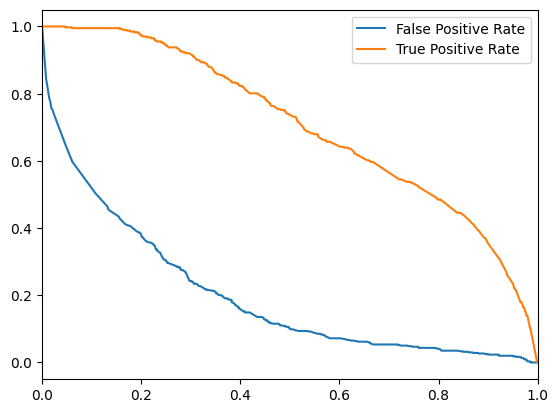

In [17]:
y_prob = clf3.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_prob)

plt.plot(thresholds, fpr)
plt.plot(thresholds, tpr)
plt.legend(['False Positive Rate', 'True Positive Rate'])
plt.xlim(0,1)  # roc_curve() sets high threshold at y_prob.max() + 1
plt.show()

AUC: 0.9155996771992878


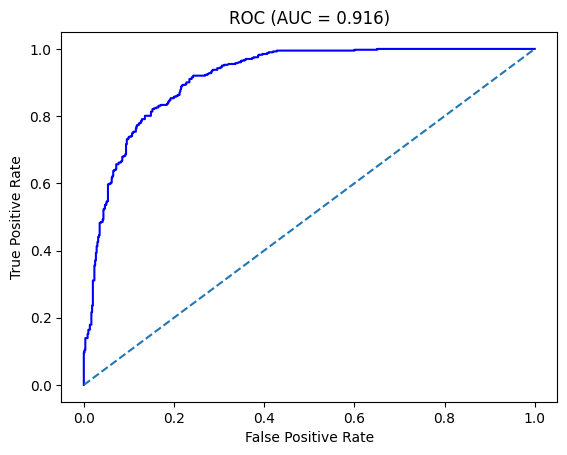

In [19]:
clf_auc = auc(fpr, tpr)
print("AUC:",clf_auc)

plt.plot(fpr, tpr, color='b')
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), linestyle="--")
plt.title(r"ROC (AUC = {:.3f})".format(clf_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Question 4

Using the model from Question 3, check the performance based on splitting the data with a 0.33 test split. Do different random_seeds affect the model performance?

1. Using the train_test_split() function, pass Female, Age and AnnualSalaryStd as the first argument, with Purchased as the second.
   1. Remember that this will return four DataFrames/Arrays: X train, X test, y train, y test
2. Train a new classifier model name clf4 on the training data.
3. Generate classification reports for in-sample prediction (using the training data) and out-of-sample prediction (using the test data)

In [18]:
X = df[['Female', 'Age', 'AnnualSalaryStd']]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
clf4 = LogisticRegression(random_state=0)
clf4.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [20]:
print(classification_report(y_train, clf4.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       409
           1       0.82      0.72      0.77       261

    accuracy                           0.83       670
   macro avg       0.83      0.81      0.82       670
weighted avg       0.83      0.83      0.83       670



In [21]:
clf4.score(X_train, y_train)

0.8313432835820895

In [22]:
print(classification_report(y_test, clf4.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       189
           1       0.86      0.67      0.75       141

    accuracy                           0.81       330
   macro avg       0.82      0.79      0.80       330
weighted avg       0.82      0.81      0.81       330



In [23]:
clf4.score(X_test, y_test)

0.8121212121212121